# Sistemas Inteligentes

## Exercício Computacional 3 - Redução de Dimensionalidade e Regressão

### Identificação do Aluno

#### Nome Completo

Matheus Prudencio dos Santos

#### RA

11114014

## Instruções

Pesquise por datasets voltados para regressões que estejam disponíveis na biblioteca Scikit, então escolha um para este exercício.

Utilize algum método de redução de dimensionalidade para realizar tal processo, então gere três modelos de regressão com diferentes métodos (um método diferente para cada modelo).

Calcule e exiba métricas que ajudem a conferir a qualidade dos modelos gerados.

Exiba gráficos que auxiliem na visualização dos dados e da curva de regressão.

Compare os modelos e comente os resultados obtidos.

Insira as referências utilizadas ao final.

## Desenvolvimento

In [1]:
# importando funções importantes

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Criando Funções para auxiliar no exércicio

# Função PCA
def pca(x):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    pca = PCA(n_components=1)
    pca = pca.fit_transform(x)
    return pca

# Função Separação dos dados em teste e treino
def separacao(x,y):
    from sklearn.model_selection import train_test_split
    x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size =0.25)
    separado = {'x_treinamento': x_treinamento, 'x_teste':x_teste, 
                'y_treinamento':y_treinamento, 'y_teste': y_teste}
    return separado

def validacao_cruzada(x, y regressor):
    from sklearn.model_selection import cross_val_score
    resultado = cross_val_score(regressor, X, y, cv = 10)
    print(resultado.mean())

# Função de treinamento do modelo
def treinamento(x_treinamento, y_treinamento, regressor):
    regressor.fit(x_treinamento, y_treinamento)
    return regressor 

# Função de predição do modelo
def predicao(x_teste, regressor):
    x_teste = np.asarray(x_teste)
    x_teste.reshape(-1,1)
    predicao = regressor.predict(x_teste)
    return predicao

def metricas(y_teste, predicao):
    from sklearn.metrics import mean_squared_error, r2_score
    mse=mean_squared_error(y_teste, predicao)
    r_square = r2_score(y_teste, predicao) 
    metricas = [mse, r_square]
    return metricas

def plot(x,y, predicao):
    plt.scatter(x, y)
    plt.plot(x, predicao, color ='red')
    plt.xlabel('PC1')
    plt.ylabel('Saida Esperada')
    plt.show()


In [3]:
# A base de dados escolhida para o exércicio é está de boston
from sklearn.datasets import load_boston

load_boston = load_boston()

x = load_boston.data
y = load_boston.target
y = y.reshape(-1,1)

x_p = pd.DataFrame(x)
x_p.describe()



,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [4]:
pca = pca(x)
base = separacao(pca,y)

In [5]:
# Os Métodos usados para fazer as regressões serão Theil-Sen, RANSAC e Least Squares.
# Ja foram treinados e fizeram sua predição

from sklearn.linear_model import LinearRegression
Linear = LinearRegression()
linear_regression = treinamento(base['x_treinamento'], base['y_treinamento'], Linear)
pred_linear = predicao(base['x_teste'], linear_regression)

from sklearn.linear_model import TheilSenRegressor
Theil_Sen = TheilSenRegressor()
theil_sen = treinamento(base['x_treinamento'], base['y_treinamento'], Theil_Sen)
pred_theil_sen= predicao(base['x_teste'], theil_sen)


from sklearn.linear_model import RANSACRegressor
Ransac = RANSACRegressor()
ransac = treinamento(base['x_treinamento'], base['y_treinamento'], Ransac)
pred_ransac= predicao(base['x_teste'], ransac)

C:\Users\Nicol\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Analisando as métricas
metri_df = pd.DataFrame()

metri_df['Linear Regression'] = metricas(base['y_teste'], pred_linear)
metri_df['Theil-Sen'] = metricas(base['y_teste'], pred_theil_sen)
metri_df['RANSAC'] = metricas(base['y_teste'], pred_ransac)

metri_df.index=['mse','r^2']
metri_df

,Linear Regression,Theil-Sen,RANSAC
mse,60.707454,59.902334,64.843578
r^2,0.125382,0.136981,0.065792


Ao analisar as métricas enocntradas nos trés modelos(mse e r^2), vemos que Theil-Sen foi quem consegui os melhores resultados, lembrando que quanto mse mais próximo do 0 melhor e quanto r^2 mais próximo do 1 melhor. mas sera que os graficos nos dizem isso?

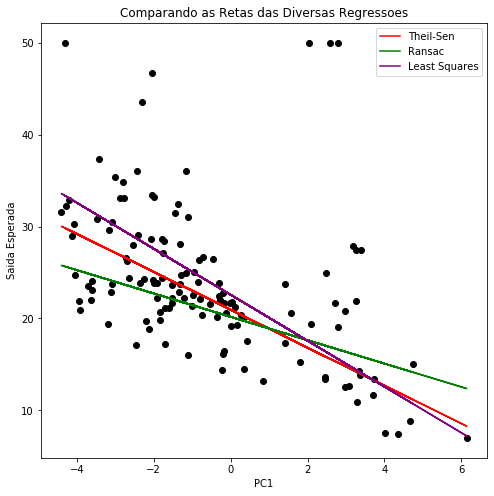

In [14]:
#plotando todos os graficos 
plt.figure(figsize =(8,8))

plt.scatter(base['x_teste'], base['y_teste'], color ='black')

plt.plot(base['x_teste'], pred_theil_sen, color = 'red',label='Theil-Sen')
plt.plot(base['x_teste'], pred_ransac, color = 'green',label='Ransac')
plt.plot(base['x_teste'], pred_linear, color = 'purple', label='Least Squares')

plt.legend()
plt.xlabel('PC1')
plt.ylabel('Saida Esperada')
plt.title('Comparando as Retas das Diversas Regressoes')
plt.show()

Ao analisar o plot, vemos que o Theil-sen (vermelho) é quem consegue explicar melhor os dados, mas ao olharmos para os dados vemos que nenhum dos modelos consegue explicar esses dados muito bem, é claro que com métricas tão abaixo do esperado que as retas não iriam conseguir explicar os dados corretamente e é isso que vejo no modelo

Qual quer analise nesses dados apartir de uma regressão linear simples fica prejudicada, pois os dados simplesmente não podem ser explicados por uma reta e esses modelos podem ser descartados apenas olhados suas métricas r^2 e mse.


## Referências

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor